In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [9]:
# Load in framingham data
df = pd.read_csv('PATH/framingham.csv')
print('NANS Before Imputation:')
print(df.isnull().sum())

# 582 patients have missing values somewhere. Rather than delete these rows, we can impute them
# Of these missing values, glucose and education are most commonly missing

# Loop through each column in the DataFrame and impute the NaN values using IterativeImputer
df_imputed = df
for column in df_imputed.columns:
    imp = IterativeImputer(max_iter=10, random_state=0)
    column_values = np.array(df_imputed[column]).reshape(-1, 1)
    imputed_column = imp.fit_transform(column_values)
    df_imputed[column] = imputed_column
print('\n NANS After Imputation:')
print(df_imputed.isnull().sum())
df = pd.read_csv('PATH/framingham.csv')
df = df.dropna()

# Split the data into features and target variable
X = df_imputed.drop('TenYearCHD', axis=1) # predictor variables
y = df_imputed['TenYearCHD'] # target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier and fit it to the training data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = rf.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = rf.score(X_test, y_test)
print('Accuracy:', accuracy)


NANS Before Imputation:
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

 NANS After Imputation:
male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64
Accuracy: 0.8525943396226415


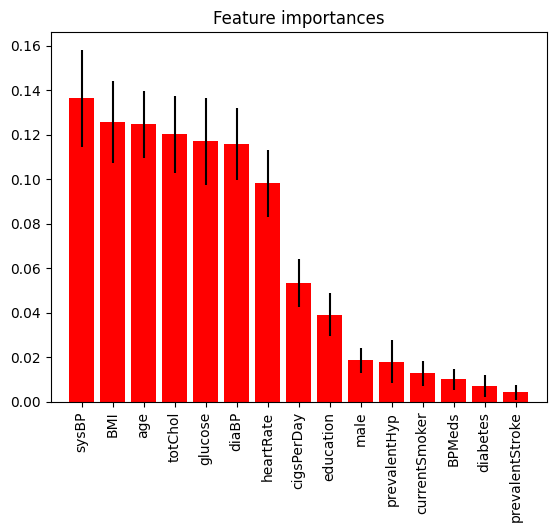

In [10]:
# Get feature importances and create a bar plot
# These are the variables that are most important for predicting heart disease
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()